In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('dataset_diabetes/diabetic_data.csv', na_values='?')
print(data.info())

C:\Users\ssear\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [28]:
data.readmitted.value_counts(dropna=False)

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [29]:
data.readmitted[data.readmitted == 'NO'] = 0
data.readmitted[data.readmitted == '>30'] = 0
data.readmitted[data.readmitted == '<30'] = 1
data.readmitted.value_counts(dropna=False)

C:\Users\ssear\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ssear\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ssear\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

0    90409
1    11357
Name: readmitted, dtype: int64

In [33]:
data.weight.value_counts(dropna=False)

NaN          98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [36]:
data.weight[data.weight == '[75-100)'] = 75
data.weight[data.weight == '[50-75)'] = 50
data.weight[data.weight == '[100-125)'] = 100
data.weight[data.weight == '[125-150)'] = 125
data.weight[data.weight == '[25-50)'] = 25
data.weight[data.weight == '[0-25)'] = 0
data.weight[data.weight == '[150-175)'] = 150
data.weight[data.weight == '[175-200)'] = 175
data.weight[data.weight == '>200'] = 200
data.weight.value_counts(dropna=False)

C:\Users\ssear\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ssear\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ssear\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

NaN      98569
75.0      1336
50.0       897
100.0      625
125.0      145
25.0        97
0.0         48
15.0        35
175.0       11
200.0        3
Name: weight, dtype: int64

In [47]:
data_weight_readmitted = pd.DataFrame({'weight':data.weight, 'readmitted':data.readmitted})
data_weight_readmitted.dropna(inplace=True)
data_weight_readmitted.reset_index(drop=True, inplace=True)
data_weight_readmitted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weight      3197 non-null   object
 1   readmitted  3197 non-null   object
dtypes: object(2)
memory usage: 50.1+ KB


C:\Users\ssear\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


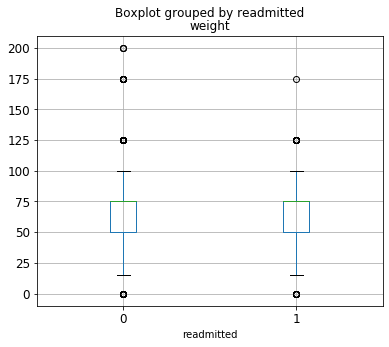

In [52]:
data_weight_readmitted.boxplot(column=['weight'], by = 'readmitted', fontsize = 12, figsize=(6,5))